In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()
X=iris.data
y=iris.target

In [8]:
#using train/test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=1)

#check classification accuracy of KNN with k=5

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import accuracy_score

print(' the accuracy score is',accuracy_score(y_test,y_pred))

 the accuracy score is 1.0


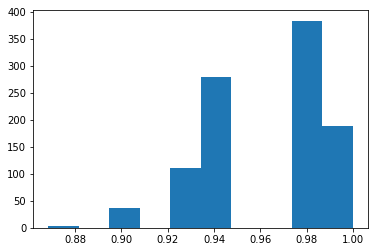

In [10]:
#the accuracy score changes if the test sample change
#lets check how
model_accuracies=[]
for i in np.arange(1000)+1:
    X_train,X_test,y_train,y_test,y_pred=[],[],[],[],[]
    X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    model_accuracies.append(accuracy_score(y_pred,y_test))
plt.hist(model_accuracies)
plt.show()
    
    

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
#10 fold crossvalidation for K=5 for KNN

knn= KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [13]:
#since this is an array, mean can be easily computed

print(scores.mean())

0.9666666666666668


(array([4., 0., 3., 0., 6., 6., 0., 8., 0., 3.]),
 array([0.95333333, 0.956     , 0.95866667, 0.96133333, 0.964     ,
        0.96666667, 0.96933333, 0.972     , 0.97466667, 0.97733333,
        0.98      ]),
 <a list of 10 Patch objects>)

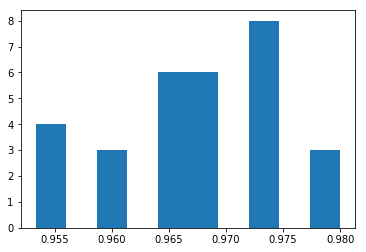

In [14]:
#search for an optimal value of K for KNN

k_range=list(range(1,31))
k_scores=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
plt.hist(k_scores)    

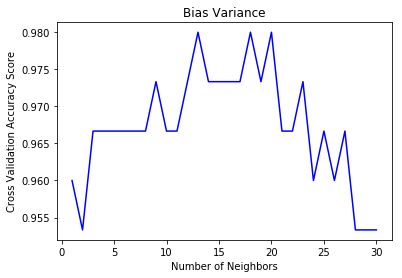

In [15]:
plt.plot(k_range,k_scores,c='b')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross Validation Accuracy Score')
plt.title('Bias Variance')
plt.show()


# using gridsearch


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [24]:
#tuning parameter using gridsearch
k_range=list(range(1,31))

knn=KNeighborsClassifier()

parameter_grid={'n_neighbors':k_range, 
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

cross_validation=StratifiedKFold(n_splits=10)

grid_search= GridSearchCV(knn,
                          param_grid=parameter_grid,
                          cv=cross_validation)

grid_search.fit(X,y)

print('Best Score :',grid_search.best_score_)
print('Best Parameters : ', grid_search.best_params_)

Best Score : 0.98
Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 13}
